Objectives

- Apply the plot method to an appropriate selection of columns of a dataframe
- Create a line plot and a scatter plot 
- Know how to find the different plot method types
- Check the datatype of a plot operation output (i.e. a matplotlib object)

Content to cover

- df[....].plot)
- df.plot() & df.plot.scatter(...)
- type() -> matplotlib Figure & ax + redirect to matplotlib


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

For this tutorial, air quality data about $NO_2$ is used, made available by [openaq](https://openaq.org) and using the [py-openaq](http://dhhagan.github.io/py-openaq/index.html) package. The `air_quality_no2.csv` data set provides $NO_2$ values for the measurement stations _FR04014_, _BETR801_ and _London Westminster_ in respectively Paris, Antwerp and London.

In [24]:
air_quality = pd.read_csv("../data/air_quality_no2.csv", 
                          index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-04-04 03:00:00,37.5,44.5,20.0
2019-04-04 04:00:00,31.5,44.8,20.0
2019-04-04 05:00:00,NaN,35.7,19.0
2019-04-04 06:00:00,NaN,53.6,19.0
2019-04-04 07:00:00,NaN,63.2,32.0


<div class="alert alert-info">
    
__Note__: the usage of the `index_col` and `parse_dates` parameters of the `read_csv` function to define the first (0th) column as index of the resulting DataFrame and convert the dates in the column to datetime objects, respectively.

</div>

## Plotting comes out of the box

![](../schemas/04_plot_overview.svg)

> I'm want a quick visual check of the data

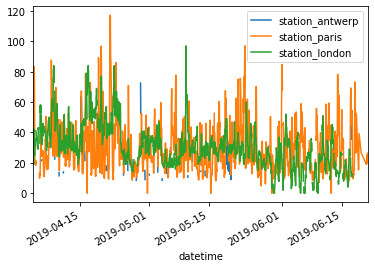

In [25]:
air_quality.plot()

With a DataFrame, Pandas creates by default one line plot for each of the columns with numeric data.

> I'm want to plot a specific column of the data table

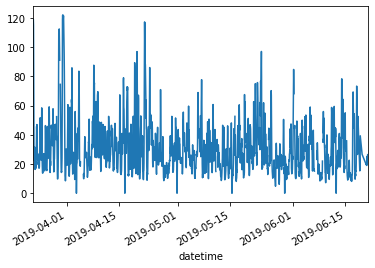

In [12]:
air_quality["station_paris"].plot()

To plot a specific column, use the selection method of the [subset data tutorial](./3_subset_data.ipynb) in combination with the `plot` method. Hence, the `plot` method works on Series (a single column of the DataFrame) as well.

> I want to compare the $N02$ values measured in London and Paris

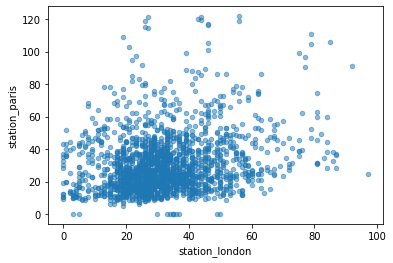

In [23]:
air_quality.plot.scatter(x="station_london", 
                         y="station_paris", 
                         alpha=0.5)

Apart from the default `line` plot when using the `plot` function, a number of alternatives are available as well to plot data. Let's use some standard Python to get an overview of the available plot methods:

In [31]:
[method_name for method_name in dir(air_quality.plot) if not method_name.startswith("_") ]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

<div class="alert alert-info">
    
__Note__: in many development environments as well as ipython and jupyter notebook, use the TAB button to get an overview of the available methods, for example `air_quality.plot.` + TAB.

</div>

One of the options is `box`, which refers to a [boxplot](https://en.wikipedia.org/wiki/Box_plot). Hence, also the `box` method is applicable on the air quality example data:

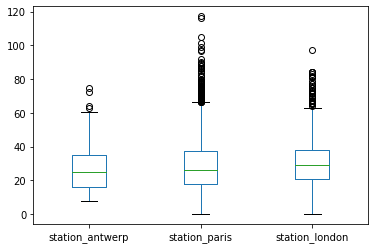

In [41]:
air_quality.plot.box()

__To user guide:__ For an introduction to the other plot methods, see :ref:`visualization.other`.

> I want each of the columns in a separate subplot

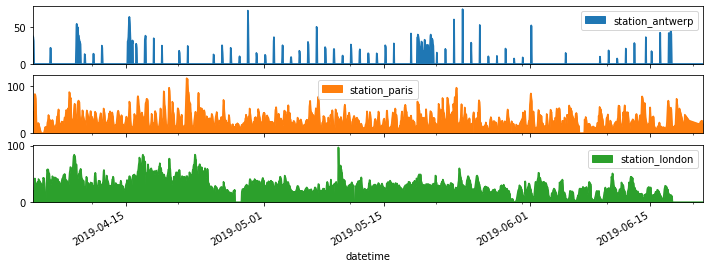

In [59]:
axs = air_quality.plot.area(figsize=(12, 4), subplots=True)

A number of builtin options are available in each of the Pandas plot functions that are worthwhile have a look

__To api guide:__ Some mote formatting options of the Pandas plot functionalities are explained in :ref:`visualization.formatting`. 

> I want to further customize, extend or save the resulting plot

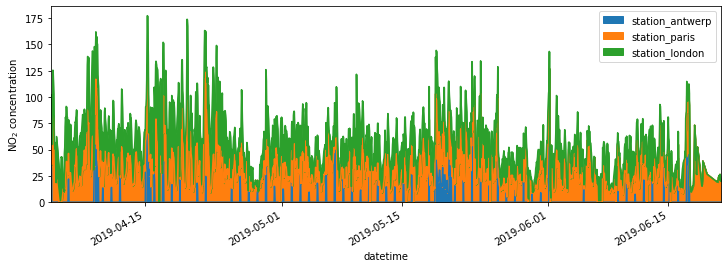

In [61]:
fig, ax_1 = plt.subplots(figsize=(12, 4))
air_quality.plot.area(ax=ax_1)
ax_1.set_ylabel("NO$_2$ concentration")
fig.savefig("no2_concentrations.png")

Each of the plot objects created by Pandas are a [Matplotlib](https://matplotlib.org/) object. As Matplotlib provides plenty of options to customize plots, making the link between both explicit enables all the power of Matplotlib to the plot. This strategy is applied in this example:

    fig, ax_1 = plt.subplots(figsize=(12, 4))        # Create an empty Matplotlib Figure and Axes
    air_quality.plot.area(ax=ax_1)                   # Use Pandas to put the area plot on the prepared Figure/Axes
    ax_1.set_ylabel("NO$_2$ concentration")          # Do any Matplotlib customization you like
    fig.savefig("no2_concentrations.png")            # Save the Figure/Axes using the existing Matplotlib method.

## REMEMBER

- The `.plot` methods are applicable on both Series and DataFrames
- By default, each of the columns is plotted as a different element (line, boxplot,...)
- Any plot created by Pandas is a Matplotlib object.

__To user guide:__ Further details about indexing is provided in :ref:`visualization`